In [3]:
# Libs para Modelagem e Matrizes
import pandas as pd
import numpy as np

# Libs para Analises Graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')


In [4]:
# Lendo dados
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')

# Verficando dados 
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
#Dimensão

df.shape

(1034, 9)

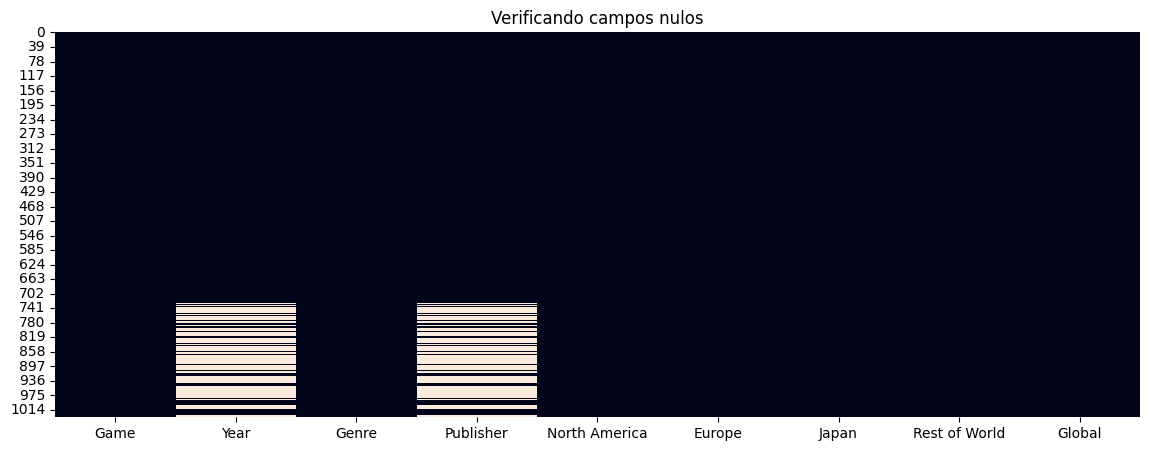

In [13]:
# Criando grafico par analisar campos nulos
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(df.isnull(), cbar=False);


In [15]:
#Retirando valores nulos 
df.dropna(inplace = True)

#verifcando
df.shape

(825, 9)

In [17]:
# Estatisticas
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


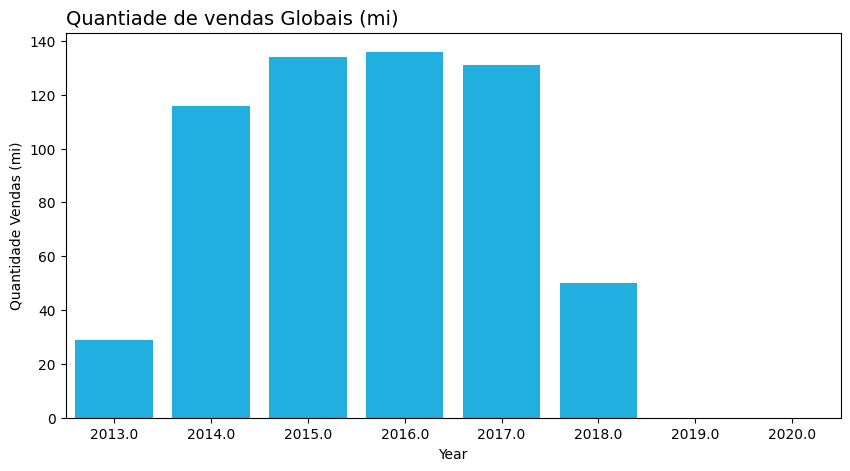

In [49]:
plt.figure(figsize=(10,5))
plt.title('Quantiade de vendas Globais (mi)', loc = 'left', fontsize = 14)
sns.barplot(data=df, x='Year', y='Global', ci=False, color='#00BFFF', estimator=sum)
plt.ylabel('Quantidade Vendas (mi)');


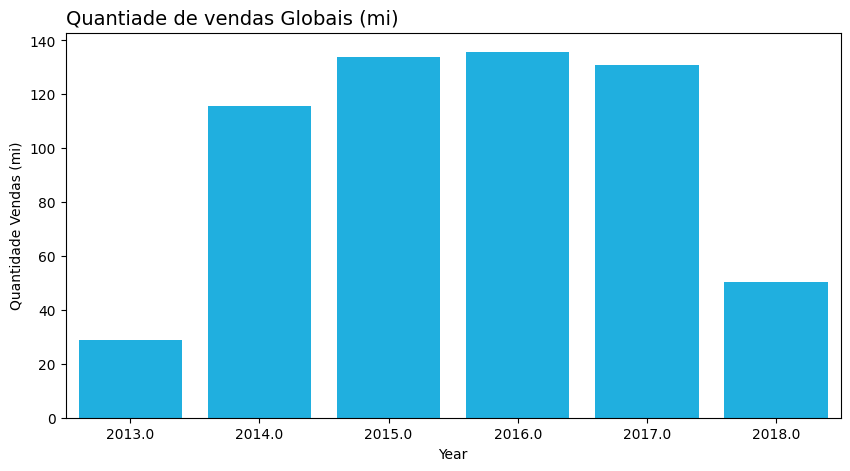

In [57]:
# Retirando ano de 2019 e 2020
df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]


# PLOTANDO NOVAMENTE O GRAFICO SEM OS ANOS RETIRADOS

plt.figure(figsize=(10,5))
plt.title('Quantiade de vendas Globais (mi)', loc = 'left', fontsize = 14)
sns.barplot(data=df, x='Year', y='Global', ci=False, color='#00BFFF', estimator=sum)
plt.ylabel('Quantidade Vendas (mi)');

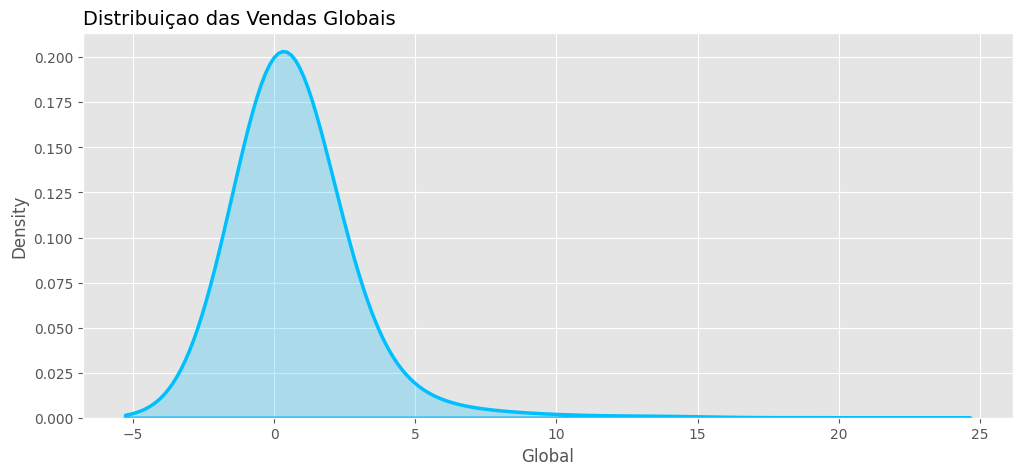

In [68]:
# PLOTANDO GRAFICO KDE

plt.figure(figsize=(12,5))
plt.style.use('ggplot')

plt.title('Distribuiçao das Vendas Globais', loc='left', fontsize = 14)
sns.kdeplot(df['Global'], shade = True, bw=1, color='#00BFFF', linewidth = 2.5);


In [86]:
Analise = df.groupby(by=['Year']).sum()
Analise

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


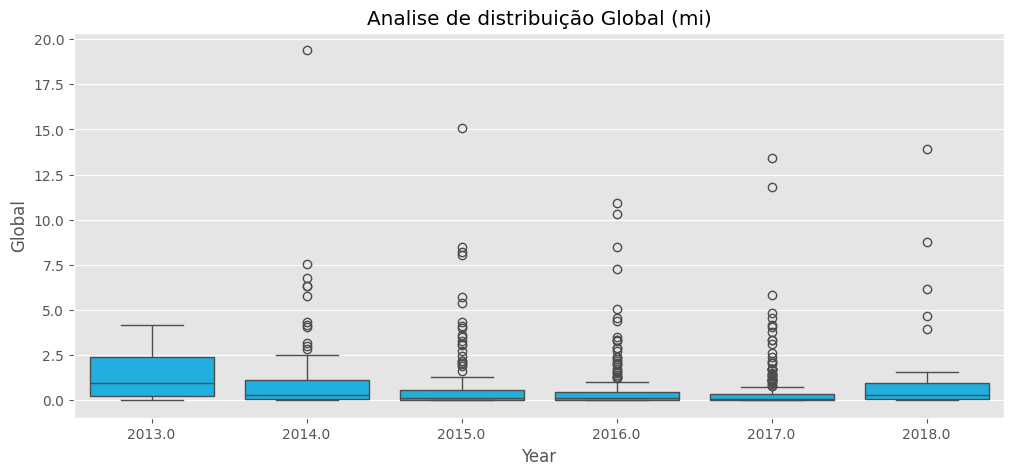

In [75]:
plt.figure(figsize=(12,5))
plt.title('Analise de distribuição Global (mi)')
sns.boxplot(data=df, x='Year', y='Global', color = '#00BFFF');

In [87]:
df.loc[df['Global'] >= 10]
Analise

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


In [91]:
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [ ]:
plt.figure(figsize=(12,5))



plt.title('Analise distribuição por continentes')